# Proyecto 2 - Support Vector Machines (SVM)
Github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

In [1]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
from sklearn.neural_network import MLPClassifier

C:\Users\Gerax\AppData\Local\Temp\ipykernel_50452\2667545751.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Seleccion de variables para entrenamiento

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Variables eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que contengan un valor nulo en algunas de sus variables restantes..

In [5]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

## Creación de variable respuesta

Se busca categorizar las casas de acuerdo a sus precios en 3 categorías: 
- económicas
- intermedias
- caras

Así que se creo una variable respuesta `SalePriceCategory` para contener estas categorías.

In [6]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

C:\Users\Gerax\AppData\Local\Temp\ipykernel_50452\2432582488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
C:\Users\Gerax\AppData\Local\Temp\ipykernel_50452\2432582488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
C:\Users\Gerax\AppData\Local\Temp\ipykernel_50452\2432582488.py:3: SettingWithCopyWar

## Análisis de multicolinealidad

En entregas pasadas ya se había analizado la correlación entre las variables del dataset con la variable respuesta de `SalePrice`. Se decidió usar el criterio de ignorar a todas las variables que tuvieran un coeficiente de correlación de Pearson mayor a 60% (r > 0.6) ya que representan las características con mayor impacto en el valor final de la propiedad. Con base en este criterio, las variables seleccionadas para entrenar el modelo son:

- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces
- GrLiveArea
- TotalBsmtSF
- GarageArea

In [7]:
X = df_cleaned.drop(["SalePriceCategory", "SalePrice"], axis=1)
y = df_cleaned["SalePriceCategory"]
data_train, data_test,target_train, target_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=0)

In [8]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Preprocessors
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("Standar Scaler", numeric_preprocessor, numerical_cols),
        ("Onehot encoder", categorical_preprocessor, categorical_cols),
    ]
)

preprocessors = make_pipeline(preprocessor)
set_config(display='diagram')
preprocessors

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Standar Scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))]))])

In [ ]:
mlp_pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(activation="logistic", random_state=42, verbose=True))
])

param_grid_1 = {
    'classifier__max_iter': (100,200,500,1000),
    'classifier__learning_rate_init': (0.01, 0.1, 1,10),
    'classifier__hidden_layer_sizes': [
    (4, 3), (5, 3), (6, 4), (7, 3), (8, 5), (5,)
]
}



mlp_model_1 = GridSearchCV(mlp_pipeline_1, param_grid_1, cv=5, scoring="accuracy", n_jobs=-1)
mlp_model_1.fit(data_train, target_train)

print("Mejor configuración Modelo 1:", mlp_model_1.best_params_)


Iteration 1, loss = 1.08517875
Iteration 2, loss = 0.93077638
Iteration 3, loss = 0.84274383
Iteration 4, loss = 0.78180895
Iteration 5, loss = 0.73435565
Iteration 6, loss = 0.69392927
Iteration 7, loss = 0.65697466
Iteration 8, loss = 0.62275067
Iteration 9, loss = 0.59237426
Iteration 10, loss = 0.56268357
Iteration 11, loss = 0.53606693
Iteration 12, loss = 0.51124681
Iteration 13, loss = 0.48835411
Iteration 14, loss = 0.46656141
Iteration 15, loss = 0.44612912
Iteration 16, loss = 0.42770369
Iteration 17, loss = 0.41188074
Iteration 18, loss = 0.39451811
Iteration 19, loss = 0.37901948
Iteration 20, loss = 0.36550732
Iteration 21, loss = 0.35299604
Iteration 22, loss = 0.34041542
Iteration 23, loss = 0.32907691
Iteration 24, loss = 0.31859517
Iteration 25, loss = 0.30845346
Iteration 26, loss = 0.29863598
Iteration 27, loss = 0.28972825
Iteration 28, loss = 0.28074503
Iteration 29, loss = 0.27244456
Iteration 30, loss = 0.26513649
Iteration 31, loss = 0.25671466
Iteration 32, los

C:\Users\Gerax\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Modelo 1 entrenamiento: 0.9843
Accuracy Modelo 1: 0.8267


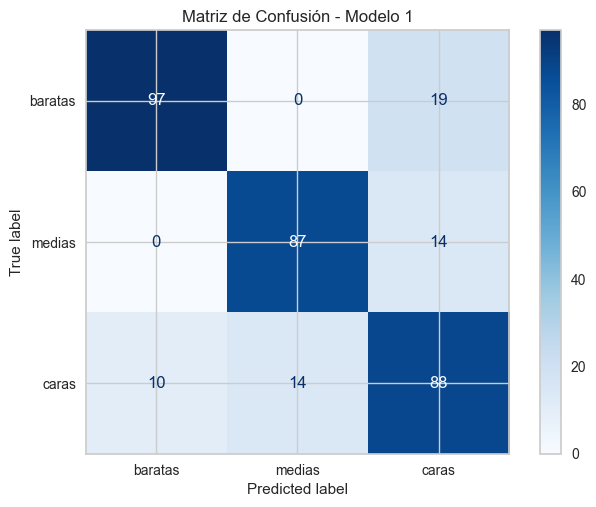

In [20]:
y_pred_2 = mlp_model_1.predict(data_train)
acc_2 = accuracy_score(target_train, y_pred_2)
print(f"Accuracy Modelo 1 entrenamiento: {acc_2:.4f}")
y_pred_1 = mlp_model_1.predict(data_test)
acc_1 = accuracy_score(target_test, y_pred_1)
print(f"Accuracy Modelo 1: {acc_1:.4f}")

# Modelo 1
ConfusionMatrixDisplay.from_estimator(mlp_model_1, data_test, target_test, display_labels=["baratas", "medias", "caras"], cmap="Blues")
plt.title("Matriz de Confusión - Modelo 1")
plt.show()



In [18]:
mlp_pipeline_2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(activation="tanh",  random_state=42, verbose=True))
])

param_grid_2 = {
    'classifier__max_iter': (100,200,500,1000),
    'classifier__learning_rate_init': (0.01, 0.1, 1,10),
    'classifier__hidden_layer_sizes': [
        (5,), (10,), (20,),
        (10, 5), (20, 10),
        (50, 30, 10), (100,)
    ]
}

mlp_model_2 = GridSearchCV(mlp_pipeline_2, param_grid_2, cv=5, scoring="accuracy", n_jobs=-1)
mlp_model_2.fit(data_train, target_train)

print("Mejor configuración Modelo 2:", mlp_model_2.best_params_)


Iteration 1, loss = 1.22005464
Iteration 2, loss = 0.56800161
Iteration 3, loss = 0.42980939
Iteration 4, loss = 0.36366870
Iteration 5, loss = 0.30549234
Iteration 6, loss = 0.26632792
Iteration 7, loss = 0.24019950
Iteration 8, loss = 0.20970590
Iteration 9, loss = 0.18250588
Iteration 10, loss = 0.16112201
Iteration 11, loss = 0.13604706
Iteration 12, loss = 0.12048443
Iteration 13, loss = 0.11596595
Iteration 14, loss = 0.10396370
Iteration 15, loss = 0.09237403
Iteration 16, loss = 0.09072183
Iteration 17, loss = 0.08121441
Iteration 18, loss = 0.07970168
Iteration 19, loss = 0.07382142
Iteration 20, loss = 0.07074526
Iteration 21, loss = 0.06830619
Iteration 22, loss = 0.06404827
Iteration 23, loss = 0.06047394
Iteration 24, loss = 0.05930477
Iteration 25, loss = 0.05623315
Iteration 26, loss = 0.05347479
Iteration 27, loss = 0.05251340
Iteration 28, loss = 0.05219405
Iteration 29, loss = 0.04871392
Iteration 30, loss = 0.04740680
Iteration 31, loss = 0.04565806
Iteration 32, los

C:\Users\Gerax\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy en entrenamiento (Modelo 2): 0.9961
Accuracy Modelo 2: 0.8146


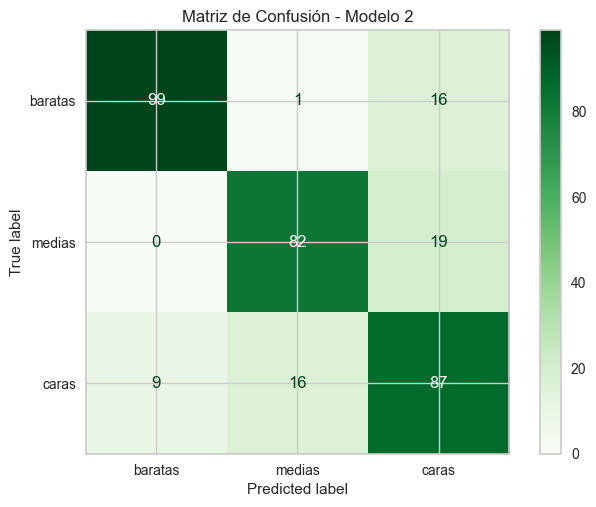

In [19]:
# Predicciones sobre el conjunto de entrenamiento
y_train_pred_2 = mlp_model_2.predict(data_train)

# Accuracy sobre entrenamiento
acc_train_2 = accuracy_score(target_train, y_train_pred_2)

print(f"Accuracy en entrenamiento (Modelo 2): {acc_train_2:.4f}")
y_pred_2 = mlp_model_2.predict(data_test)
acc_2 = accuracy_score(target_test, y_pred_2)
print(f"Accuracy Modelo 2: {acc_2:.4f}")
# Modelo 2
ConfusionMatrixDisplay.from_estimator(mlp_model_2, data_test, target_test, display_labels=["baratas", "medias", "caras"], cmap="Greens")
plt.title("Matriz de Confusión - Modelo 2")
plt.show()


## Compración

| modelo de RNA activacion | Accuracy training | Accuracy test |
| -----  | -----  | ---- |
| logistic | 0.9843 | 0.8267 |
| tanh | 0.9961 | 0.8146 |

Ambos modelos aprenden bastante bien los datos de entrenamiento, pero bajan en acurracy. Este bajon no es tan significativo como para decir sobreajuste pero si son algo leves.El modelo con función de activación logística presentó un rendimiento ligeramente superior en precisión general (82.67%) frente al modelo con activación tanh (81.46%). Sin embargo, esta mejora vino con un mayor costo computacional, ya que el entrenamiento del modelo logistic fue significativamente más lento. En cuanto a las equivocaciones, ambos modelos mostraron dificultades para clasificar correctamente los productos de la clase caras, siendo esta la categoría con más confusiones. A pesar de ello, el modelo logistic mantuvo un mejor balance entre todas las clases, siendo el más robusto en predicciones. Por su parte, el modelo tanh, aunque más eficiente, presentó mayor tendencia a confundir clases intermedias. Esto sugiere que el modelo logistic podría preferirse cuando la prioridad es la precisión, mientras que tanh es más adecuado en escenarios donde el rendimiento computacional es lo mas importante.

## Sobreajuste
Al analizar los resultados de precisión sobre los conjuntos de entrenamiento y prueba, se observa que ambos modelos presentan un grado de sobreajuste, aunque es leve y no afecta mucho al desempeño. El Modelo 1 alcanza una precisión de 98.43% en entrenamiento frente a 82.67% en prueba, mientras que el Modelo 2  obtiene 99.61% en entrenamiento y 81.46% en prueba. Esta diferencia entre rendimientos indica que los modelos aprenden muy bien los datos de entrenamiento, pero pierden algo de generalización al enfrentarse a nuevos datos. Sin embargo, dado que las precisiones en prueba se mantienen relativamente altas, el sobreajuste puede considerarse moderado. Es decir, existe, pero no compromete gravemente el desempeño del modelo. El Modelo 1 presenta un mejor equilibrio entre ambos conjuntos, lo cual lo hace más confiable para ser utilizado en predicción.

In [26]:
mlp_pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(activation="logistic", random_state=42, verbose=True))
])

param_grid_mejorado = {
    'classifier__hidden_layer_sizes': [(5,), (6,), (5, 2)],
    'classifier__learning_rate_init': [0.001, 0.005, 0.01],
    'classifier__alpha': [0.0001, 0.001, 0.01], 
    'classifier__max_iter': [300, 500] 
}



mlp_model_1 = GridSearchCV(mlp_pipeline_1, param_grid_mejorado, cv=5, scoring="accuracy", n_jobs=-1)
mlp_model_1.fit(data_train, target_train)

print("Mejor configuración Modelo 1:", mlp_model_1.best_params_)


Iteration 1, loss = 1.15510401
Iteration 2, loss = 1.13101451
Iteration 3, loss = 1.10745796
Iteration 4, loss = 1.08537052
Iteration 5, loss = 1.06454007
Iteration 6, loss = 1.04496076
Iteration 7, loss = 1.02660636
Iteration 8, loss = 1.00965987
Iteration 9, loss = 0.99391850
Iteration 10, loss = 0.97895028
Iteration 11, loss = 0.96494022
Iteration 12, loss = 0.95169346
Iteration 13, loss = 0.93925559
Iteration 14, loss = 0.92750247
Iteration 15, loss = 0.91641191
Iteration 16, loss = 0.90590662
Iteration 17, loss = 0.89590260
Iteration 18, loss = 0.88620302
Iteration 19, loss = 0.87691282
Iteration 20, loss = 0.86804255
Iteration 21, loss = 0.85940869
Iteration 22, loss = 0.85107486
Iteration 23, loss = 0.84302008
Iteration 24, loss = 0.83514064
Iteration 25, loss = 0.82756713
Iteration 26, loss = 0.82011070
Iteration 27, loss = 0.81289554
Iteration 28, loss = 0.80596125
Iteration 29, loss = 0.79913659
Iteration 30, loss = 0.79247617
Iteration 31, loss = 0.78598604
Iteration 32, los

C:\Users\Gerax\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Modelo 1 entrenamiento: 0.9503
Accuracy Modelo 1: 0.8389


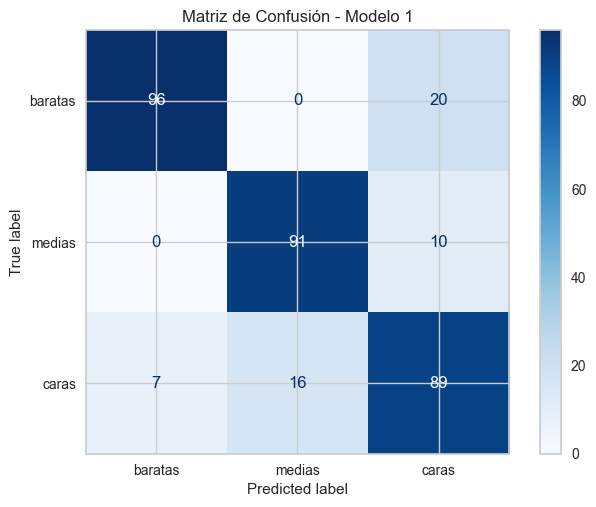

In [27]:
y_pred_2 = mlp_model_1.predict(data_train)
acc_2 = accuracy_score(target_train, y_pred_2)
print(f"Accuracy Modelo 1 entrenamiento: {acc_2:.4f}")
y_pred_1 = mlp_model_1.predict(data_test)
acc_1 = accuracy_score(target_test, y_pred_1)
print(f"Accuracy Modelo 1: {acc_1:.4f}")

# Modelo 1
ConfusionMatrixDisplay.from_estimator(mlp_model_1, data_test, target_test, display_labels=["baratas", "medias", "caras"], cmap="Blues")
plt.title("Matriz de Confusión - Modelo 1")
plt.show()



Se seleccionó como modelo final el que tiene activación logística, al ser el que mostró el mejor equilibrio entre rendimiento y generalización. Tras un re proceso, donde se busco tener un mejor rendimiento ajustando, el número de iteraciones, la regularización y la arquitectura de capas ocultas. se logró reducir el leve sobreajuste detectado inicialmente. El modelo ajustado obtuvo una precisión en entrenamiento de 95.03% y una precisión en prueba de 83.89%, mejorando la distancia entre ambos y demostrando un comportamiento más estable y confiable. La matriz de confusión muestra un alto nivel de aciertos en todas las clases, especialmente en la clase "medias", aunque persisten algunas confusiones en la predicción de productos "caras", lo cual representa una posible área de mejora futura.